In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

mushroom_data = pd.read_csv("mushrooms.csv")
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Hot Encoding 

In [ ]:
target = 'class' # The class we want to predict
labels = mushroom_data[target]
features = mushroom_data.drop(target, axis=1) # Remove the target class from the dataset

In [ ]:
cat = features.columns # Since every fearure is categorical we use features.columns
features = pd.concat([features, pd.get_dummies(features[cat])], axis=1) # Convert every categorical feature with one hot encoding
features.drop(cat, axis=1, inplace=True) # Drop the original feature, leave only the encoded ones

labels = pd.get_dummies(labels)['p'] # Encode the target class, 1 is deadly 0 is safe to eat

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.3, random_state=42)

In [ ]:
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


### Random Forest Classifier

In [ ]:
start_time_RF = datetime.datetime.now()

In [ ]:
Model_RF = RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200, random_state=1)
Model_RF.fit(X_train, y_train)
predictions_RF = Model_RF.predict(X_test)

In [ ]:
training_time_RF = datetime.datetime.now() - start_time_RF

print (training_time_RF)

0:00:02.143756


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score, precision_score,roc_curve
from sklearn.model_selection import GridSearchCV,train_test_split
import scikitplot as skplt
print(classification_report(y_test,predictions_RF))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1257
           1       1.00      0.91      0.95      1181

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [ ]:
ac = accuracy_score(y_test,predictions_RF)
print('accuracy_score of random forest model:',ac)

accuracy_score of random forest model: 0.9581624282198523


In [ ]:
conf_RF = pd.DataFrame(confusion_matrix(y_test, predictions_RF),
                   index = ['Actual Positive', 'Actual Negative'],
                   columns = ['Predict Positive', 'Predict Negative'])
print(conf_RF)

                 Predict Positive  Predict Negative
Actual Positive              1257                 0
Actual Negative               102              1079


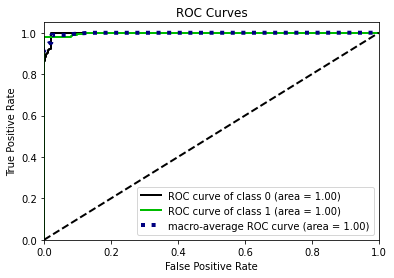

In [ ]:
pred_RF = Model_RF.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, pred_RF, plot_micro = False)
plt.show()

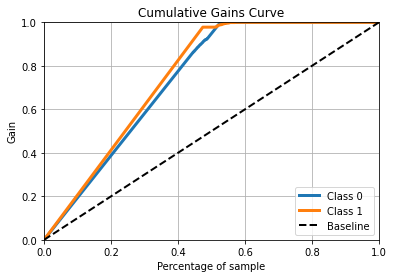

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, pred_RF)
plt.show()

### Knn Classifier

In [ ]:
start_time_Knn = datetime.datetime.now()

In [ ]:
Model_Knn = KNeighborsClassifier(n_neighbors=3)
Model_Knn.fit(X_train, y_train)
predictions_Knn = Model_Knn.predict(X_test)
print(classification_report(y_test, predictions_Knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:
training_time_Knn = datetime.datetime.now() - start_time_Knn

print (training_time_Knn)

0:00:01.880379


In [ ]:
ac_knn = accuracy_score(y_test,predictions_Knn)
print('accuracy_score of knn model:',ac_knn)

accuracy_score of knn model: 1.0


In [ ]:
conf_Knn = pd.DataFrame(confusion_matrix(y_test, predictions_Knn),
                   index = ['Actual Positive', 'Actual Negative'],
                   columns = ['Predict Positive', 'Predict Negative'])
print(conf_Knn)

                 Predict Positive  Predict Negative
Actual Positive              1257                 0
Actual Negative                 0              1181


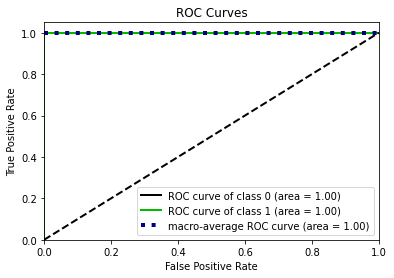

In [ ]:
pred_Knn = Model_Knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, pred_Knn, plot_micro = False)
plt.show()

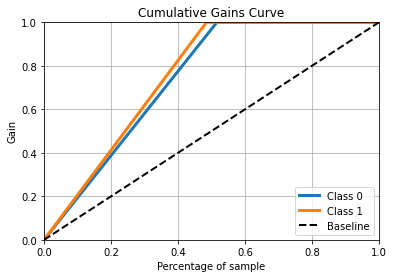

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, pred_Knn)
plt.show()

### Naive Bayes Classifier

In [ ]:
start_time_NB = datetime.datetime.now()

In [ ]:
from sklearn.naive_bayes import GaussianNB
Model_NB = GaussianNB()
predictions_NB = Model_NB.fit(X_train, y_train).predict(X_test)

In [ ]:
print(classification_report(y_test, predictions_NB))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1257
           1       0.93      1.00      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.97      0.97      0.96      2438
weighted avg       0.97      0.96      0.96      2438



In [ ]:
training_time_NB = datetime.datetime.now() - start_time_NB

print (training_time_NB)

0:00:01.873649


In [ ]:
ac_NB = accuracy_score(y_test,predictions_NB)
print('accuracy_score of knn model:',ac_NB)

accuracy_score of knn model: 0.9643150123051681


In [ ]:
conf_NB = pd.DataFrame(confusion_matrix(y_test, predictions_NB),
                   index = ['Actual Positive', 'Actual Negative'],
                   columns = ['Predict Positive', 'Predict Negative'])
print(conf_NB)

                 Predict Positive  Predict Negative
Actual Positive              1171                86
Actual Negative                 1              1180


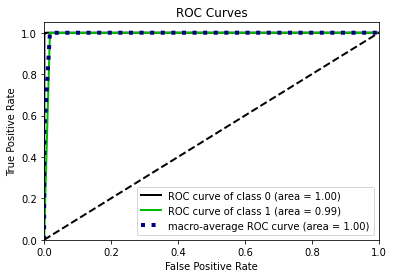

In [ ]:
pred_NB = Model_NB.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, pred_NB, plot_micro = False)
plt.show()

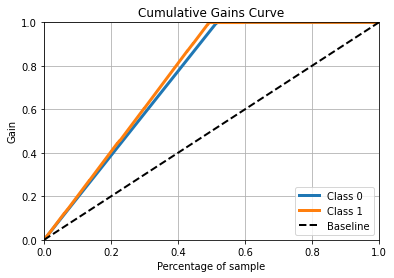

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, pred_NB)
plt.show()

### Decision Tree Classifier

In [ ]:
start_time_DT = datetime.datetime.now()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train, y_train)
predictions_DT =Model_DT.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:
training_time_DT = datetime.datetime.now() - start_time_DT

print (training_time_DT)

0:00:02.102615


In [ ]:
ac_DT = accuracy_score(y_test,predictions_DT)
print('accuracy_score of knn model:',ac_DT)

accuracy_score of knn model: 1.0


In [ ]:
conf_DT = pd.DataFrame(confusion_matrix(y_test, predictions_DT),
                   index = ['Actual Positive', 'Actual Negative'],
                   columns = ['Predict Positive', 'Predict Negative'])
print(conf_DT)

                 Predict Positive  Predict Negative
Actual Positive              1257                 0
Actual Negative                 0              1181


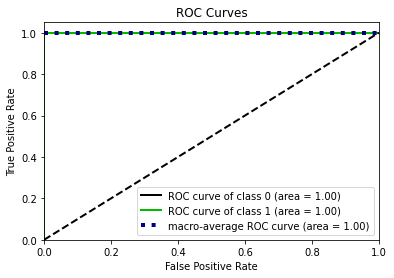

In [ ]:
pred_DT = Model_DT.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, pred_DT, plot_micro = False)
plt.show()

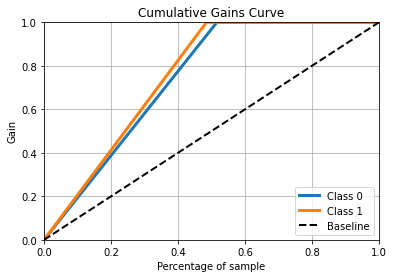

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, pred_DT)
plt.show()

### Model Evaluation

In [ ]:
print('---------------------------------------------')
print ('Naive Bayes Classifier')
print('---------------------------------------------')
print('Accuracy Score:',accuracy_score(y_test,predictions_NB))
print('Precision Score:',precision_score(y_test,predictions_NB))
print('F1 Score:',f1_score(y_test,predictions_NB))
print('---------------------------------------------')
print ('K-Neareast Neighbour Classifier')
print('---------------------------------------------')
print('Accuracy Score:',accuracy_score(y_test,predictions_Knn))
print('Precision Score:',precision_score(y_test,predictions_Knn))
print('F1 Score:',f1_score(y_test,predictions_Knn))
print('---------------------------------------------')
print ('Random Forest Classifier')
print('---------------------------------------------')
print('Accuracy Score:',accuracy_score(y_test,predictions_RF))
print('Precision Score:',precision_score(y_test,predictions_RF))
print('F1 Score:',f1_score(y_test,predictions_RF))
print('---------------------------------------------')
print ('Decision Tree Classifier')
print('---------------------------------------------')
print('Accuracy Score:',accuracy_score(y_test,predictions_DT))
print('Precision Score:',precision_score(y_test,predictions_DT))
print('F1 Score:',f1_score(y_test,predictions_DT))
print('---------------------------------------------')

---------------------------------------------
Naive Bayes Classifier
---------------------------------------------
Accuracy Score: 0.9643150123051681
Precision Score: 0.9320695102685624
F1 Score: 0.9644462607274213
---------------------------------------------
K-Neareast Neighbour Classifier
---------------------------------------------
Accuracy Score: 1.0
Precision Score: 1.0
F1 Score: 1.0
---------------------------------------------
Random Forest Classifier
---------------------------------------------
Accuracy Score: 0.9581624282198523
Precision Score: 1.0
F1 Score: 0.9548672566371682
---------------------------------------------
Decision Tree Classifier
---------------------------------------------
Accuracy Score: 1.0
Precision Score: 1.0
F1 Score: 1.0
---------------------------------------------
